## Lecture Laplace Transform 2
---

- [1. Laplace Transform](#Laplace-Transform)
    - [1.1 Definition](#Definition)
    - [1.2 Region of Convergence](#Region-of-Convergence)

- [2. LTI-Systems](#LTI-Systems)
    - [2.1 Definition and Introduction](#Definition-and-Introduction)
    - [2.2 Transfer Function](#Transfer-Function)
    - [2.3 Zero-Pole Representation](#Zero-Pole-Representation)
    - [2.4 Frequency Response, Bode plot](#Frequency-Response,-Bode-plot)
    - [2.5 Impulse and Step Response](#Impulse-and-Step-Response)
        
- [3. Introduction-to-scipy.signal.lti](#Introduction-to-scipy.signal.lti)
    - [3.1 Setup an LTI system in Scipy](#Setup-an-LTI-system-in-Scipy)
    - [3.2 Pole-Zero Plot with Python Control](#Pole-Zero-Plot-with-Python-Control)
    - [3.3 Frequency Response and Bode Plot](#Frequency-Response-and-Bode-Plot)
    - [3.4 Impulse and step resonse](#Impulse-and-step-resonse)
    - [3.5 Constructing the Magnitude Bode Plot from the Pole-Zero Plot](#Constructing-the-Magnitude-Bode-Plot-from-the-Pole-Zero-Plot)

In [53]:
import numpy as np
import matplotlib.pyplot as plt

### Laplace Transform
---
#### Definition
The Laplace transform of a signal f(t) is given by
$$
F(s) = \int_0^{\infty} f(t) e^{-st}\mathrm{d}t
$$
where $s=\delta+i\omega$. The Laplace transform is hence a complex valued function (i.e. $F:\mathbb{C}\rightarrow \mathbb{C}$), which may be drawn in the complex $s$-plane with 
- $\delta$ beeing the real and 
- $\omega$ beeing the imaginary part.

#### Region of Convergence
The region of convergence is the area of all values $s$ in the complex plane, where $F(s)$ converges to a finite value. Es an example consider the function $e^{at}$. We have 
$$
F(s) = \int_0^{\infty}  e^{(a-s)t}\mathrm{d}t = \left[\frac{1}{(a-s)}e^{(a-s)t}\right]_0^{\infty} = 
\frac{1}{s-a}
$$
if $a-\delta<0$ or $\delta>a$. For $a=-2$ the region of convergence is depicted in the figure below.


<img src="ROC.png" height="100" width="450"/>

### LTI-Systems
---

#### Definition and Introduction
A continuous LTI system is described by an the following ODE with constant coeﬃcients:
$$
\left(
a_n\frac{\mathrm{d}^n}{\mathrm{d}t^n} + 
a_{n-1}\frac{\mathrm{d}^{n-1}}{\mathrm{d}t^{n-1}}
+ \ldots + 
a_1\frac{\mathrm{d}}{\mathrm{d}t}+ a_0\right)y(t) = 
\left(
b_m\frac{\mathrm{d}^m}{\mathrm{d}t^m} + 
b_{m-1}\frac{\mathrm{d}^{m-1}}{\mathrm{d}t^{m-1}}
+ \ldots + 
b_1\frac{\mathrm{d}}{\mathrm{d}t}+ b_0
\right) x(t)
$$

<img src="LTI_System.png" height="100" width="450"/>

We are interested in the input-output relationships and seek a method of determining the response $y(t)$ to a given input $x(t)$. 

####  Transfer Function

The transfer function of an LTI system described by the above ODE is given by
$$
H(s) = \frac{b_ms^m+b_{m-1}s^{m-1}+b_1s+b_0}{a_ns^n +a_{n-1}s^{n-1} +\ldots + a_1s + a_0} = 
\frac{\sum\limits_{k=0}^m b_k s^k}{\sum\limits_{k=0}^n a_ks^k}
$$

#### Zero-Pole Representation
Decomposing the numerator and denominator represents the system as the continuous- or discrete-time transfer function as
$$
H(s) = k\frac{\prod\limits_{k=1}^m(s-z_k)}{\prod\limits_{k=1}^n(s-p_k)}
$$
where
- $k=\frac{b_m}{a_n}$ is the **gain**
- $s_k$ are the **zeros** of the system
- $p_k$ are the **poles** of the system

**BIBO stability**: A system is called BIBO (Bounded Input, Bounded Output) stable, if **every** bounded input $x(t)$ leads to a bounded output $y(t)$.

The poles determine the BIBO Stability of the LTI system, as these poles govern the homogenuous part, also known as the **natural response** of the system, of the solution $y(t)=y_h(t)+y_p(t)$. The natural response is given by
$$
y_h(t) = \sum_k c_k e^{p_k\cdot t} = \sum_k c_k e^{\alpha_kt}e^{i\beta_k t}
$$
Writing $p_k=\alpha_k+i\beta_k$ we have the following conditions for BIBO stability
- If all $\alpha_k<0$ (i.e. the poles reside on the left hand side of the complex plane) the system is
stable
- If at least one $\alpha_k=0$ (i.e. one pole resides on the imaginary axis) an all other $\alpha_k<0$ the system is  marginally stable
- If at least one $\alpha_k>0$ (i.e. one pole resides on the right hand side og the imaginary axis) the system is  unstable

Both, the poles and zeros can easily be depicted in a zero-pole-plot (see below). Figure 2 from http://web.mit.edu/2.14/www/Handouts/PoleZero.pdf contains a collection of the homogeneous response from the system pole locations on the pole-zero plot.


<img src="s_plane_stable_unstable_regions.png" height="100" width="650"/>

#### Frequency Response, Bode plot
We obtain the frequency response of an LTI system, when we evaluate the transfer function at $s=i\omega$
$$
H(i\omega) = \frac{b_m(i\omega)^m+b_{m-1}(i\omega)^{m-1}+b_1i\omega+b_0}{a_n(i\omega)^n +a_{n-1}(i\omega)^{n-1} +\ldots + a_1i\omega + a_0} = 
\frac{\sum\limits_{k=0}^m b_k (i\omega)^k}{\sum\limits_{k=0}^n a_k(i\omega)^k}
$$

#### Impulse and Step Response
Both impulse response and step response are important quantities when dealing with LTI systems
- The impulse response is the output when  $x(t)=\delta(t)$
- The step response is the input when $x(t) = \Theta(t)$


### Introduction to scipy.signal.lti
---

Scipy comes with a package for Signal processing: https://docs.scipy.org/doc/scipy/reference/signal.html. We will give a short introduction in the **Continuous-time linear systems**.  


#### Setup an LTI system in Scipy
An LTI system in scipy may either be given by the 
- The transfer function https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html#scipy.signal.TransferFunction (note the different way the polynomial coefficients have to be entered).
- Zero-Poles-Gain https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ZerosPolesGain.html#scipy.signal.ZerosPolesGain 

As an example consider a system with transfer function $H:\mathbb{C}\rightarrow \mathbb{C}$
$$
H(s) = \frac{4s}{s^2+2s+5} = 4 \frac{(s-0)}{\left[s-(-1-2i)\right][s-(-1+2i)]}
$$

In [30]:
sys1 = signal.ZerosPolesGain([0],[-1-2j,-1+2j],4)
sys2 = signal.TransferFunction([4,0],[1,2,5])

#### Pole-Zero Plot with Python Control

Create a Pole-Zero Plot with Python control library: https://python-control.readthedocs.io/

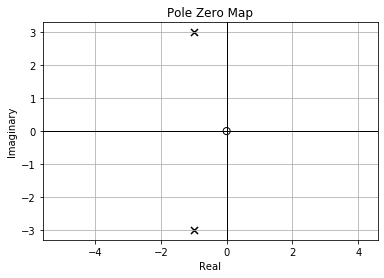

In [31]:
import control as c
sys = c.tf([2,0],[1,2,10])
c.pzmap(sys)
plt.grid()

#### Frequency Response and Bode Plot

- The frequency response $H(i\omega)=|H(i\omega)|e^{i\phi(\omega)}$ is a complex function, containing the absolute value (magnitude) $|H(i\omega)|$ and the phase $\phi(\omega)$. See: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqresp.html#scipy.signal.freqresp
- The Bode plot generates both function seperately. See: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html#scipy.signal.bode.  Note that instead of $|H(i\omega)|$ the bode()-function calculates the magnitude in Dezibels, i.e.
$$
20\cdot \log_{10}|H(i\omega)|
$$

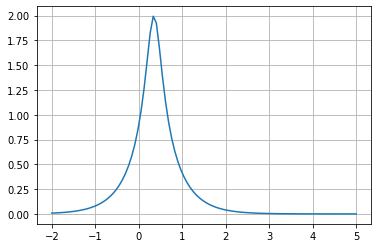

In [32]:
# Frequency Response
w1,H1 = sys1.freqresp(w=np.logspace(-2,5,100))
plt.plot(np.log10(w1),np.abs(H1))
plt.grid()

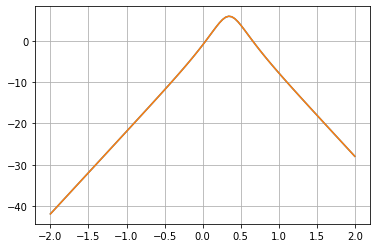

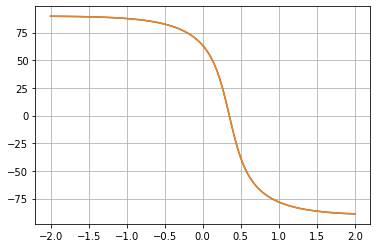

In [33]:
####################
# Frequency Response
####################
w1,H1 = sys1.freqresp(w=np.logspace(-2,2,100))
plt.plot(np.log10(w1),20*np.log10(np.abs(H1)))

####################
# Bode plot
####################
w2,H2,phi = sys1.bode(w=np.logspace(-2,2,100))
# Bode Magnitude Plot
plt.plot(np.log10(w2),H2)
plt.grid()
plt.show()
# Bode Phase Plot
plt.plot(np.log10(w2),phi)
plt.grid()
plt.plot(np.log10(w1),np.rad2deg(np.angle(H1)))

Note: The magnitude of the frequency response may also be visualized by considering $|H(s)|$ on the entire s-plane and than taking a line-cut at $s=i\omega$ (see red doted line in the left figure) below.

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


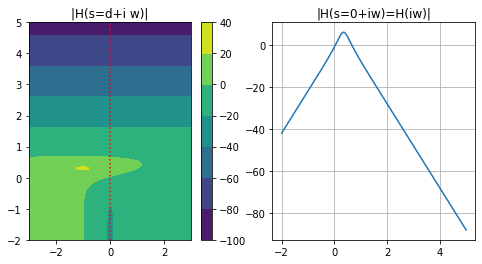

In [34]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
a,b = np.meshgrid(np.linspace(-3,3,101),np.logspace(-2,5,1000))
H = 4*(a+1j*b)/((a+1j*b)**2+2*(a+1j*b)+5)
plt.subplot(1,2,1)
plt.contourf(a,np.log10(b),20*np.log10(np.abs(H)))
plt.title('|H(s=d+i w)|')
plt.vlines(0,-2,5,linestyles='dotted',colors='r')
plt.colorbar()
plt.subplot(1,2,2)
plt.plot(np.log10(np.logspace(-2,5,1000)),20*np.log10(H[a==0]))
plt.title('|H(s=0+iw)=H(iw)|')
plt.grid()

#### Impulse and step resonse
Note the following relationship for the impulse response $h_i(t)$ and step response $h_s(t)$ 
$$
h_s(t) = \int_0^t h_i(\tau)\mathrm{d}\tau
$$

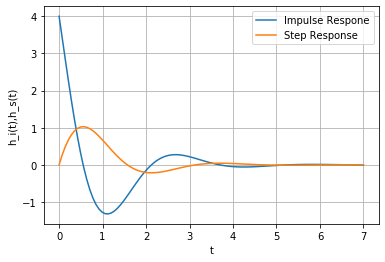

In [35]:
# Impulse response
t,h =sys2.impulse()
plt.plot(t,h,label='Impulse Respone')

# Step Response
t,h =sys2.step()
plt.plot(t,h,label='Step Response')
plt.grid()
plt.legend()
plt.xlabel('t')
plt.ylabel('h_i(t),h_s(t)')
plt.show()

####  Constructing the Magnitude Bode Plot from the Pole-Zero Plot

Check chapter 3.1 from http://web.mit.edu/2.14/www/Handouts/PoleZero.pdf for a gentle introduction, how to construct the Magnitude Bode Plot from the Pole-Zero Plot. 
#### Example 1
We follow this explanation to construct the asymptotes for the tranfer function
$$
H(s) = \frac{4s}{s^2+2s+5}
$$
- There is one break frequency at $\omega_b=\sqrt{5}$ (depicted as the black dotted line in the figure below).
- For $\omega\rightarrow 0 $ we obtain 
$$
H(i\omega) = \frac{4}{5}i\omega
$$
- For $\omega\rightarrow \infty$ we obtain 
$$
H(i\omega) = \frac{4}{i\omega}
$$

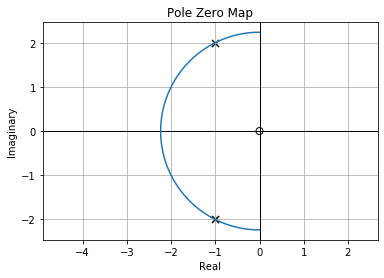

In [36]:
sys = c.tf([4,0],[1,2,5])
 
figure, axes = plt.subplots() 
c.pzmap(sys)
plt.plot(np.sqrt(5)*np.sin(np.linspace(-np.pi,0,100)),np.sqrt(5)*np.cos(np.linspace(0,np.pi,100)))
plt.grid()
plt.Circle((0.1,0.1),1)

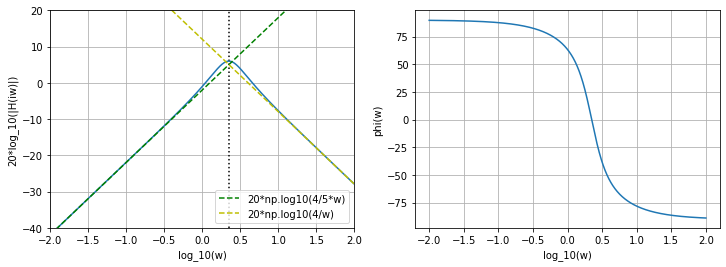

In [37]:
sys = signal.TransferFunction([4,0],[1,2,5])
w,H,phi = sys.bode(w=np.logspace(-2,2,1000))

plt.figure(figsize=(12,4))

# Magnitude plot
plt.subplot(1,2,1)
plt.plot(np.log10(w),H)
plt.plot(np.log10(w),20*np.log10(4/5*w),'g--',label='20*np.log10(4/5*w)')
plt.plot(np.log10(w),20*np.log10(4/w),'y--',label='20*np.log10(4/w)')
plt.vlines(np.log10(np.sqrt(5)),-40,20,linestyles='dotted')
plt.legend()
plt.xlabel('log_10(w)')
plt.ylabel('20*log_10(|H(iw)|)')
plt.grid()
plt.axis([-2,2,-40,20])

# Phase plot
plt.subplot(1,2,2)
plt.plot(np.log10(w),phi)
plt.xlabel('log_10(w)')
plt.ylabel('phi(w)')
plt.grid()

#### Example 2
We consider the simple transfer function
$$
H(s) = \frac{5}{s+5} = \frac{5}{s-(-5)}
$$

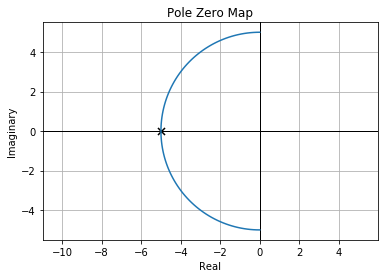

In [38]:
sys = c.tf([5],[1,5])
figure, axes = plt.subplots() 
c.pzmap(sys)
plt.plot(5*np.sin(np.linspace(-np.pi,0,100)),5*np.cos(np.linspace(0,np.pi,100)))
plt.grid()

ZerosPolesGainContinuous(
array([], dtype=float64),
array([-5]),
5,
dt: None
)


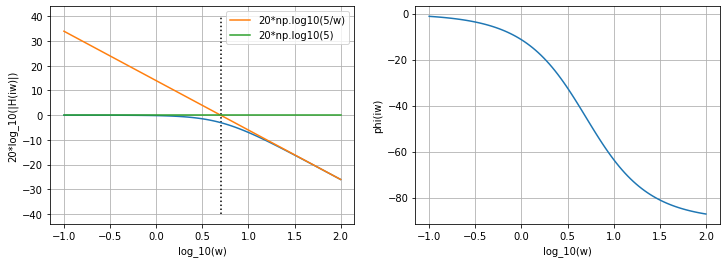

In [39]:
sys = signal.ZerosPolesGain([],[-5],5)
print(sys)
w, mag, phi = sys.bode()

plt.figure(figsize=(12,4))

# Magnitude plot
plt.subplot(1,2,1)
plt.plot(np.log10(w),mag)
plt.vlines(np.log10(5),-40,40,linestyles='dotted')
plt.plot(np.log10(w),20*np.log10(5/w),label='20*np.log10(5/w)')
plt.plot(np.log10(w),20*np.log10(1)+0*w,label='20*np.log10(5)')
plt.grid()
plt.legend()
plt.xlabel('log_10(w)')
plt.ylabel('20*log_10(|H(iw)|)')

# Phase plot
plt.subplot(1,2,2)
plt.plot(np.log10(w),phi)
plt.xlabel('log_10(w)')
plt.ylabel('phi(iw)')
plt.grid()

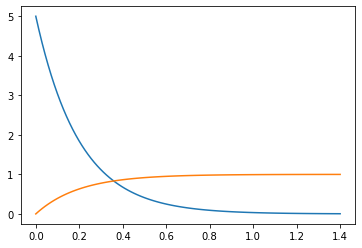

In [38]:
t, h_s = sys.step()
t, h_i = sys.impulse()
plt.plot(t,h_i)
plt.plot(t,h_s)